In [1]:
def right(a1,a2,a3,a4,a5):
    return lambda X: np.exp(-((X-a1)/a2)**a3)

def left(a1,a2,a3,a4,a5):
    return lambda X: np.exp(-((a1-X)/a4)**a5)

def f(X, a1, a2, a3, a4, a5):
    print(a1, a2, a3, a4, a5)
    return np.piecewise(X, [X <a1, X >= a1], [left(a1,a2,a3,a4,a5), right(a1,a2,a3,a4,a5)])

def optimizing_function(X, c1, c2, a1, a2, a3, a4, a5):
    return c1 + c2*f(X, a1, a2, a3, a4, a5)

In [2]:
%matplotlib inline
import numpy as np
from sklearn.gaussian_process import GaussianProcess, GaussianProcessRegressor
import matplotlib.pyplot as plt
from scipy import interpolate
import pickle
from scipy.optimize import curve_fit

In [3]:
sigma = 3
a = 1/sigma/2*3.14
b = 0
c = sigma

fun = lambda x: a*np.exp(-((x-b)**2)/2*c*c)



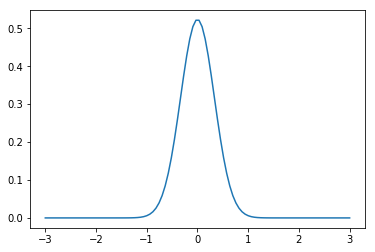

In [4]:
XX = np.linspace(-3, 3, 100)
plt.plot(XX, fun(XX))

0.0 1.0 3.0 1.0 1.0
0.0 1.0 3.0 1.0 1.0
0.0 1.0 3.0 1.0 1.0
1.4901161193847656e-08 1.0 3.0 1.0 1.0
0.0 1.0000000149011612 3.0 1.0 1.0
0.0 1.0 3.0000000447034836 1.0 1.0
0.0 1.0 3.0 1.0000000149011612 1.0
0.0 1.0 3.0 1.0 1.0000000149011612
-0.10004192087009225 0.9121978616559183 2.909204969253592 0.5266451735179192 1.0238894291318632
-0.10004192087009225 0.9121978616559183 2.909204969253592 0.5266451735179192 1.0238894291318632
-0.10004192087009225 0.9121978616559183 2.909204969253592 0.5266451735179192 1.0238894291318632
-0.10004193577125345 0.9121978616559183 2.909204969253592 0.5266451735179192 1.0238894291318632
-0.10004192087009225 0.9121978765570795 2.909204969253592 0.5266451735179192 1.0238894291318632
-0.10004192087009225 0.9121978616559183 2.909205012604124 0.5266451735179192 1.0238894291318632
-0.10004192087009225 0.9121978616559183 2.909204969253592 0.5266451884190804 1.0238894291318632
-0.10004192087009225 0.9121978616559183 2.909204969253592 0.5266451735179192 1.0238894443

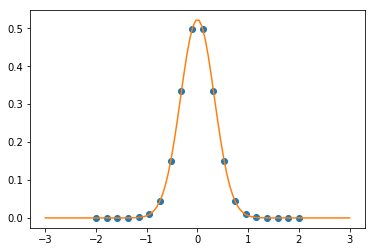

In [5]:
bounds1 = [-np.inf,-np.inf,-1,-np.inf,2,-np.inf,-np.inf,]
bounds2 = [np.inf,np.inf,1,np.inf,np.inf,np.inf,np.inf,]

points = np.linspace(-2,2, 20)
plt.plot(points, fun(points), "o")
plt.plot(XX, fun(XX))
popt, pcov = curve_fit(optimizing_function, points, fun(points), bounds=(bounds1,bounds2))

In [61]:
popt

array([  0.15593772,  -0.1549689 ,   2.00000106, -29.85902931,
        11.5850575 ,   1.35967701,  14.36495729])

-3.031891594196319e-06 0.4714079374694897 2.0000235726423266 0.47140145040780024 1.9999870968117899
-3.031891594196319e-06 0.4714079374694897 2.0000235726423266 0.47140145040780024 1.9999870968117899
-3.031891594196319e-06 0.4714079374694897 2.0000235726423266 0.47140145040780024 1.9999870968117899


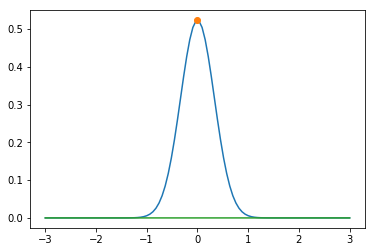

In [6]:
plt.plot(XX, optimizing_function(XX, *popt))
plt.plot([popt[2]], optimizing_function([popt[2]], *popt), "o")
plt.plot(XX, fun(XX) - optimizing_function(XX, *popt))

In [7]:
optimizing_function(np.array([1.2, 1.25]),1,1,1.3,1,1.5, 1, 1)

1.3 1 1.5 1 1


array([1.90483742, 1.95122942])

In [7]:
base = np.array([   0,  240, 1200, 1440, 1680, 2160, 2400, 2640, 2880, 3120, 3360, 3840,
 4080, 4560, 4680, 4800, 5040, 5160, 5400, 5520, 5640, 5760, 6000, 6240,
 6360, 6480, 6600, 6720, 6840, 6960, 7080, 7200, 7320, 7800, 8160, 8280,
 8400, 8520, 8640,])/8640

y = np.array([0.02036184,0.02843447,0.04326497,0.05995213,0.06721836,0.06615018
,0.07514981,0.0761786,0.07790663,0.07377242,0.07694607,0.07473234
,0.07389965,0.06575911,0.0646993,0.07795964,0.07459857,0.07179485
,0.06588331,0.06360748,0.05640887,0.05418754,0.05295252,0.05424232
,0.05550884,0.05561659,0.052651,0.05417072,0.05343226,0.05602891
,0.05010089,0.04887273,0.0500459,0.04233742,0.04712131,0.04211249
,0.04369377,0.04000209,0.03895116]
)


0.5 1.0 3.0 1.0 1.0
0.5 1.0 3.0 1.0 1.0
0.5 1.0 3.0 1.0 1.0
0.5000000149011612 1.0 3.0 1.0 1.0
0.5 1.0000000149011612 3.0 1.0 1.0
0.5 1.0 3.0000000447034836 1.0 1.0
0.5 1.0 3.0 1.0000000149011612 1.0
0.5 1.0 3.0 1.0 1.0000000149011612
0.4996960291650136 1.1068431807426473 2.999613642849832 1.468933179153319 1.115796584382637
0.4996960291650136 1.1068431807426473 2.999613642849832 1.468933179153319 1.115796584382637
0.4996960291650136 1.1068431807426473 2.999613642849832 1.468933179153319 1.115796584382637
0.4996960440661748 1.1068431807426473 2.999613642849832 1.468933179153319 1.115796584382637
0.4996960291650136 1.1068431972358959 2.999613642849832 1.468933179153319 1.115796584382637
0.4996960291650136 1.1068431807426473 2.9996136875475585 1.468933179153319 1.115796584382637
0.4996960291650136 1.1068431807426473 2.999613642849832 1.468933201042129 1.115796584382637
0.4996960291650136 1.1068431807426473 2.999613642849832 1.468933179153319 1.1157966010093017
0.4996356615415896 1.979046

/Users/joosko/work/ijs/ml/Perceptive_Sentinel/eo-learn/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


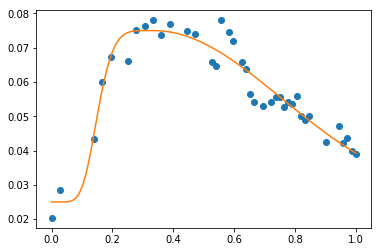

In [9]:
plt.plot(base, y, 'o')
cutoff_bounds = min(base), max(base)
bounds1 = [-np.inf,-np.inf,cutoff_bounds[0],-np.inf,2,-np.inf,-np.inf,]
bounds2 = [np.inf,np.inf,cutoff_bounds[1],np.inf,np.inf,np.inf,np.inf,]

points = np.linspace(base[0], base[-1], 100)
popt, pcov = curve_fit(optimizing_function, base, y, bounds=(bounds1,bounds2))
plt.plot(points, optimizing_function(points, *popt))

In [8]:
(times_g, series_g, vals_g, resamp_g) = pickle.load(open("../../features/eolearn/tests/test_out.pickle", "rb"))
times_g = np.array(times_g)
series_g = np.array(series_g)
vals_g = np.array(vals_g)
resamp_g = np.array(resamp_g)

In [175]:
def right(a1,a2,a3,a4,a5):
    return lambda X: np.exp(-((X-a1)/a2)**a3)

def left(a1,a2,a3,a4,a5):
    return lambda X: np.exp(-((a1-X)/a4)**a5)

def f(X, a1, a2, a3, a4, a5):
    #print(a1, a2, a3, a4, a5)
    return np.piecewise(X, [X <a1, X >= a1], [left(a1,a2,a3,a4,a5), right(a1,a2,a3,a4,a5)])

def optimizing_function(X, c1, c2, a1, a2, a3, a4, a5):
    #global glob
    #glob += 1
    return c1 + c2*f(X, a1, a2, a3, a4, a5)

glob = 0

def fit_optimize(X, Y, p0=None):
    # Normalize
    norm = (X[-1] - X[0])
    X = X/norm
    bounds1 = [-1,-np.inf,X[0],0.15,2,0.15,2,]
    bounds2 = [1,np.inf,X[-1],np.inf,np.inf,np.inf,np.inf,]
    if p0 is None:
        p0 = [np.mean(X/norm), 0.2, 0.5, 0.15, 10, 0.15, 10]
    print(bounds1)
    print(bounds2)
    print(p0)
    popt, pcov = curve_fit(optimizing_function, X, Y, bounds=(bounds1,bounds2), maxfev=1000000, 
                           absolute_sigma=True)
    return lambda x: optimizing_function(x/norm, *popt), popt


def mid(X):
    mid_val = (max(X) - min(X))/2
    ind = 0
    for ind, val in enumerate(X):
        if val > mid_val:
            break
    return ind, mid_val

def fst(X, mid_val):
    for ind, val in enumerate(X):
        if val > mid_val:
            break
    return X[:ind]

def snd(X, mid_val):
    for ind, val in enumerate(X):
        if val > mid_val:
            break
    return X[ind:]

In [38]:
def plot_fst(X,Y):
    norm = (X[-1] - X[0])
    X = X/norm
    bounds1 = [-np.inf,-np.inf,X[0],0.1,2,0.1,2,]
    bounds2 = [np.inf,np.inf,X[-1],np.inf,np.inf,np.inf,np.inf,]
    p0 = [0, 1, 0.5, 1, 3, 1, 3]
    plt.plot(X, optimizing_function(X/norm,*p0))
    
    


[ 0.11412627  0.20310716  0.57204343  0.1637354  18.00301152  0.17495974
 17.16545168]


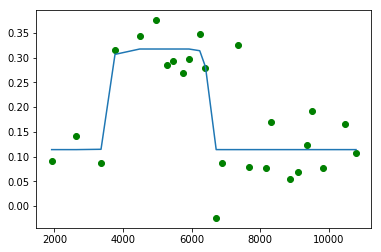

In [44]:
norrr = XX[-1] - XX[0]
plt.plot(XX, Y_orig, "og")
print(params)
plt.plot(XX, optimizing_function(XX/norrr, *params))
#plot_fst(XX, 1)

68 8880


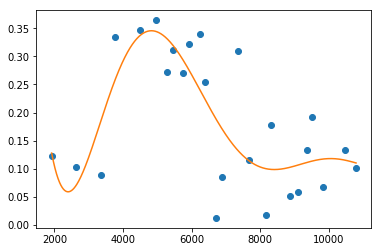

In [146]:
import random
ind = random.randint(0,len(times_g)-1)
ind = 68
mid_ind, mid_val = mid(times_g[0])
part = fst

XX = times_g[ind][3:mid_ind]
Y_orig = -series_g[ind][3:mid_ind]
nu = XX[-1] - XX[0]
print(ind, nu)
XX_full = np.linspace(XX[0], XX[-1], 1000)
clf = GaussianProcessRegressor()
clf.fit(XX.reshape(-1,1)/nu, Y_orig.reshape(-1,1))
plt.plot(XX,Y_orig, 'o')
plt.plot(XX_full, clf.predict(XX_full.reshape(-1,1)/nu))

[-1, -inf, 0.21621621621621623, 0.15, 2, 0.15, 2]
[1, inf, 1.2162162162162162, inf, inf, inf, inf]
[8.591429267104941e-05, 0.2, 0.5, 0.15, 10, 0.15, 10]
[0.11049483679475622, 0.2105841379139508, 0.5819755424186781, 0.15000000000000002, 14.82862566070557, 0.1892106023452086, 27.195354704556664]
CPU times: user 7.57 s, sys: 92.3 ms, total: 7.66 s
Wall time: 7.74 s


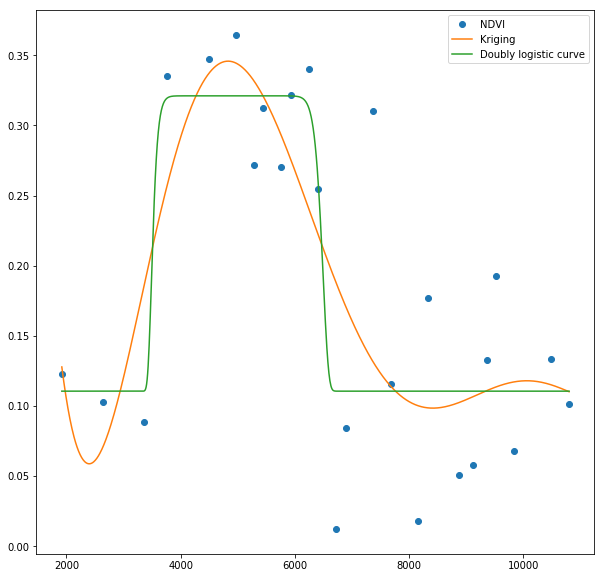

In [167]:
%%time
fig = plt.figure(figsize = (10,10))
plt.plot(XX,Y_orig, 'o')
plt.plot(XX_full, clf.predict(XX_full.reshape(-1,1)/nu))
pp = None;#[0.09780712838540458, 0.2125416190700786, 0.5834647310791778, 0.15000000000000002, 19.11487874952399, 0.19369651238063307, 35.48861800436115]
func, params = fit_optimize(XX, Y_orig, pp)

plt.plot(XX_full, func(XX_full))

print(list(params))

plt.legend(["NDVI", "Kriging", "Doubly logistic curve"])
#plt.savefig("double_log1.png", bbox_inches="tight")

In [168]:
glob


65388

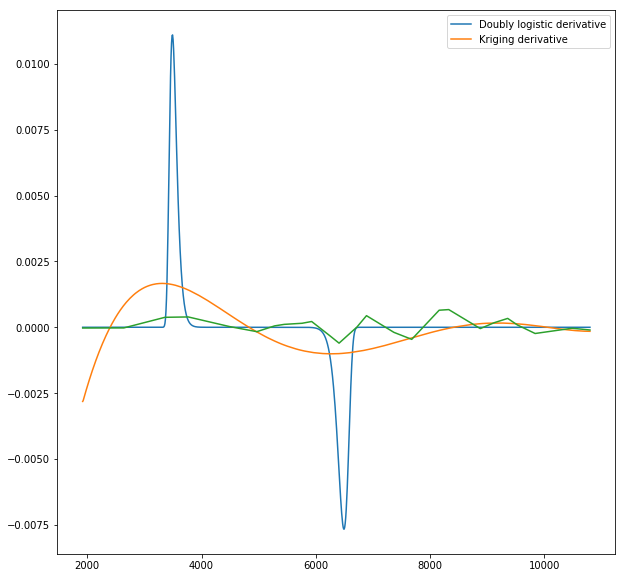

In [164]:
fig = plt.figure(figsize = (10,10))
plt.plot(XX_full, np.gradient(func(XX_full)))
plt.plot(XX_full, np.gradient((clf.predict(XX_full.reshape(-1,1)/nu)).flatten()))
plt.legend(["Doubly logistic derivative", "Kriging derivative"])
plt.plot(XX, np.gradient(Y_orig, XX))
#plt.savefig("derivatives.png", bbox_inches="tight")


In [156]:
a = clf.predict(XX_full.reshape(-1,1)/nu)

(1000, 1)

[-1, -inf, 0.21621621621621623, 0.15, 2, 0.15, 2]
[1, inf, 1.2162162162162162, inf, inf, inf, inf]
[8.591429267104941e-05, 0.2, 0.5, 0.15, 10, 0.15, 10]
[0.09780712838540458, 0.2125416190700786, 0.5834647310791778, 0.15000000000000002, 19.11487874952399, 0.19369651238063307, 35.48861800436115]


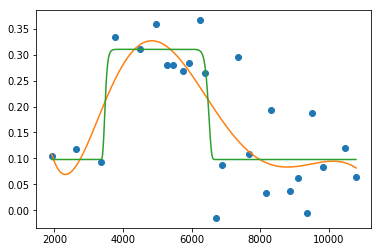

In [108]:
plt.plot(XX,Y_orig, 'o')
plt.plot(XX_full, clf.predict(XX_full.reshape(-1,1)/nu))

func, params = fit_optimize(XX, Y_orig)
plt.plot(XX_full, func(XX_full))
print(list(params))

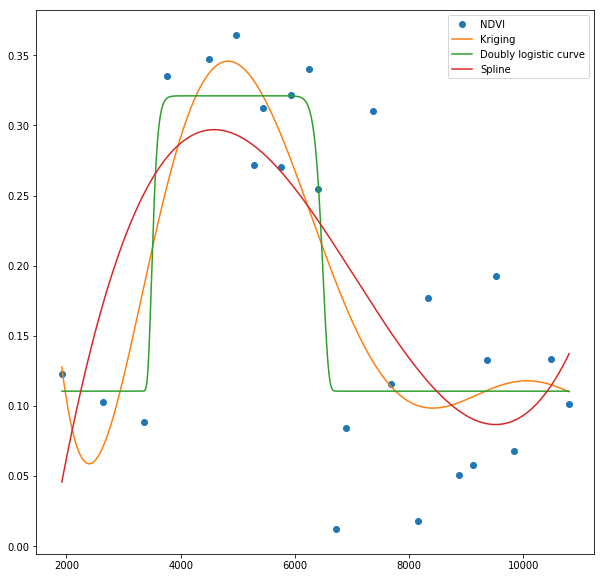

In [165]:
fig = plt.figure(figsize = (10,10))
plt.plot(XX,Y_orig, 'o')
plt.plot(XX_full, clf.predict(XX_full.reshape(-1,1)/nu))
plt.plot(XX_full, func(XX_full))
plt.plot(XX_full, interpolate.UnivariateSpline(XX, Y_orig)(XX_full))
plt.legend(["NDVI", "Kriging", "Doubly logistic curve", "Spline"])
plt.savefig("double_log_spline.png", bbox_inches="tight")

In [71]:

1/0
times_n = len(times_g[0])//4
resamp_n = len(resamp_g[0])//2
nu = max(times_g[0])
print(ind, nu, times_n, resamp_n)
clf = GaussianProcessRegressor()
clf.fit(times_g[ind][:times_n].reshape(-1,1)/nu, series_g[ind][:times_n].reshape(-1,1))
plt.plot(times_g[ind][:times_n], series_g[ind][:times_n], 'o')
plt.plot(resamp_g[ind][:resamp_n],clf.predict(resamp_g[ind][:resamp_n].reshape(-1,1)/nu), 'o')

ZeroDivisionError: division by zero

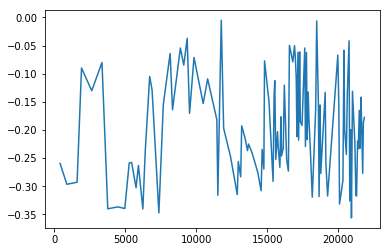

In [25]:
fit_optimize(XX, Y_orig)

In [23]:
times_g[0]

array([  -408,   -888,  -1608,  -1920,  -2640,  -3360,  -3768,  -4488,
        -4968,  -5280,  -5448,  -5760,  -5928,  -6240,  -6408,  -6720,
        -6888,  -7368,  -7680,  -8160,  -8328,  -8808,  -8880,  -9120,
        -9360,  -9528,  -9840, -10488, -10800, -11448, -11520, -11760,
       -11928, -12408, -12888, -12960, -13128, -13200, -13440, -13608,
       -13680, -13920, -14328, -14568, -14640, -14760, -14808, -15120,
       -15408, -15480, -15528, -15600, -15720, -15768, -15888, -15960,
       -16008, -16128, -16200, -16368, -16488, -16560, -16800, -16920,
       -16968, -17040, -17088, -17160, -17208, -17280, -17328, -17448,
       -17640, -17688, -17760, -17808, -17880, -17928, -18048, -18168,
       -18408, -18480, -18600, -18648, -18720, -18768, -19080, -19128,
       -19248, -19968, -20040, -20088, -20328, -20400, -20448, -20568,
       -20640, -20760, -20808, -20880, -20928, -21000, -21168, -21240,
       -21288, -21360, -21408, -21480, -21528, -21600, -21648, -21720,
      

[-1, -inf, 0.0, 0.15, 2, 0.15, 2]
[1, inf, 1.0, inf, inf, inf, inf]
[0.05, 0.2, 0.5, 0.15, 10, 0.15, 10]


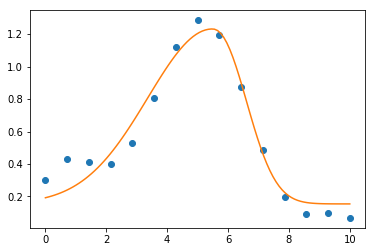

In [171]:
XXX = np.linspace(0,10,15)
XXX_full = np.linspace(0,10,100)
orig_fun = lambda XXX:np.sin(XXX/3) + 0.3*np.cos(10*XXX)
YYY = orig_fun(XXX)
ff, prm = fit_optimize(XXX, YYY)
plt.plot(XXX, YYY, 'o')
plt.plot(XXX_full, ff(XXX_full))
#plt.plot(XXX_full, orig_fun(XXX_full))

In [86]:
prm


array([ 0.50999677, -0.45326625,  0.6       , 14.83665428, 16.4345538 ,
        0.27646561,  2.        ])

In [184]:
%%time
ff, prm = fit_optimize(XXX, YYY)

[-1, -inf, 0.0, 0.15, 2, 0.15, 2]
[1, inf, 1.0, inf, inf, inf, inf]
[0.05, 0.2, 0.5, 0.15, 10, 0.15, 10]
CPU times: user 27.8 ms, sys: 3.25 ms, total: 31 ms
Wall time: 28.7 ms


In [180]:
glob = 0